In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [118]:
data = pd.read_csv('201901-202003.csv')
data = data.fillna('')

In [12]:
def grap_year(data):
    data = str(data)
    return int(data[:4])

def grap_month(data):
    data = str(data)
    return int(data[4:])

In [13]:
# 날짜 처리
data['year'] = data['REG_YYMM'].apply(lambda x: grap_year(x))
data['month'] = data['REG_YYMM'].apply(lambda x: grap_month(x))
data = data.drop(['REG_YYMM'], axis=1)

In [14]:
# 데이터 정제
df = data.copy()
df = df.drop(['CARD_CCG_NM', 'HOM_CCG_NM'], axis=1)

columns = ['CARD_SIDO_NM', 'STD_CLSS_NM', 'HOM_SIDO_NM', 'AGE', 'SEX_CTGO_CD', 'FLC', 'year', 'month']
df = df.groupby(columns).sum().reset_index(drop=False)

In [15]:
df.to_csv('train.csv', encoding='utf-8-sig')

In [16]:
df

,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,SEX_CTGO_CD,FLC,year,month,CSTMR_CNT,AMT,CNT
0,강원,건강보조식품 소매업,강원,20s,1,1,2019,1,4,311200,4
1,강원,건강보조식품 소매업,강원,20s,1,1,2019,2,3,605000,3
2,강원,건강보조식품 소매업,강원,20s,1,1,2019,6,3,139000,3
3,강원,건강보조식품 소매업,강원,20s,1,1,2019,8,3,27500,3
4,강원,건강보조식품 소매업,강원,20s,1,1,2019,9,3,395500,3
...,...,...,...,...,...,...,...,...,...,...,...
1057389,충북,휴양콘도 운영업,충북,70s,2,5,2019,3,3,148000,4
1057390,충북,휴양콘도 운영업,충북,70s,2,5,2019,5,5,329800,7
1057391,충북,휴양콘도 운영업,충북,70s,2,5,2019,10,7,557800,7
1057392,충북,휴양콘도 운영업,충북,70s,2,5,2019,12,3,247800,3


In [17]:
df['AVG_SPEND'] = df['AMT']/df['CNT']

In [18]:
df

,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,SEX_CTGO_CD,FLC,year,month,CSTMR_CNT,AMT,CNT,AVG_SPEND
0,강원,건강보조식품 소매업,강원,20s,1,1,2019,1,4,311200,4,77800.000000
1,강원,건강보조식품 소매업,강원,20s,1,1,2019,2,3,605000,3,201666.666667
2,강원,건강보조식품 소매업,강원,20s,1,1,2019,6,3,139000,3,46333.333333
3,강원,건강보조식품 소매업,강원,20s,1,1,2019,8,3,27500,3,9166.666667
4,강원,건강보조식품 소매업,강원,20s,1,1,2019,9,3,395500,3,131833.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
1057389,충북,휴양콘도 운영업,충북,70s,2,5,2019,3,3,148000,4,37000.000000
1057390,충북,휴양콘도 운영업,충북,70s,2,5,2019,5,5,329800,7,47114.285714
1057391,충북,휴양콘도 운영업,충북,70s,2,5,2019,10,7,557800,7,79685.714286
1057392,충북,휴양콘도 운영업,충북,70s,2,5,2019,12,3,247800,3,82600.000000


In [19]:
df = df.drop('CSTMR_CNT', axis=1)

In [20]:
df

,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,SEX_CTGO_CD,FLC,year,month,AMT,CNT,AVG_SPEND
0,강원,건강보조식품 소매업,강원,20s,1,1,2019,1,311200,4,77800.000000
1,강원,건강보조식품 소매업,강원,20s,1,1,2019,2,605000,3,201666.666667
2,강원,건강보조식품 소매업,강원,20s,1,1,2019,6,139000,3,46333.333333
3,강원,건강보조식품 소매업,강원,20s,1,1,2019,8,27500,3,9166.666667
4,강원,건강보조식품 소매업,강원,20s,1,1,2019,9,395500,3,131833.333333
...,...,...,...,...,...,...,...,...,...,...,...
1057389,충북,휴양콘도 운영업,충북,70s,2,5,2019,3,148000,4,37000.000000
1057390,충북,휴양콘도 운영업,충북,70s,2,5,2019,5,329800,7,47114.285714
1057391,충북,휴양콘도 운영업,충북,70s,2,5,2019,10,557800,7,79685.714286
1057392,충북,휴양콘도 운영업,충북,70s,2,5,2019,12,247800,3,82600.000000


In [22]:
from sklearn.preprocessing import LabelEncoder
# 인코딩
dtypes = df.dtypes
encoders = {}
for column in df.columns:
    if str(dtypes[column]) == 'object':
        encoder = LabelEncoder()
        encoder.fit(df[column])
        encoders[column] = encoder
        
df_num = df.copy()        
for column in encoders.keys():
    encoder = encoders[column]
    df_num[column] = encoder.transform(df[column])

In [23]:
df_num

,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,SEX_CTGO_CD,FLC,year,month,AMT,CNT,AVG_SPEND
0,0,0,0,1,1,1,2019,1,311200,4,77800.000000
1,0,0,0,1,1,1,2019,2,605000,3,201666.666667
2,0,0,0,1,1,1,2019,6,139000,3,46333.333333
3,0,0,0,1,1,1,2019,8,27500,3,9166.666667
4,0,0,0,1,1,1,2019,9,395500,3,131833.333333
...,...,...,...,...,...,...,...,...,...,...,...
1057389,16,40,16,6,2,5,2019,3,148000,4,37000.000000
1057390,16,40,16,6,2,5,2019,5,329800,7,47114.285714
1057391,16,40,16,6,2,5,2019,10,557800,7,79685.714286
1057392,16,40,16,6,2,5,2019,12,247800,3,82600.000000


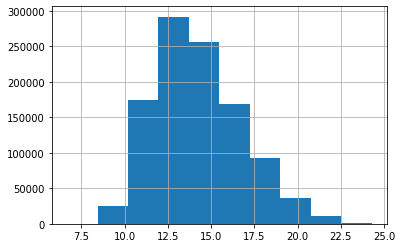

In [25]:
np.log1p(df['AMT']).hist()

In [85]:
# feature, target 설정
train_num = df202003.sample(frac=1, random_state=0)
train_features = train_num.drop(['AMT', 'CNT', 'AVG_SPEND','year','month'], axis=1)
train_target = np.log1p(train_num['AMT'])

In [86]:
train_features

,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,SEX_CTGO_CD,FLC
963318,15,19,9,3,1,3
18778,0,18,8,2,1,1
399810,7,1,7,3,2,4
32587,0,25,11,1,2,1
271722,4,16,14,3,1,3
...,...,...,...,...,...,...
886332,14,18,4,3,1,3
1016566,16,11,16,2,2,1
817489,13,18,4,3,1,2
836875,13,31,16,4,1,4


In [87]:
from lightgbm import LGBMRegressor

lgbm_reg = LGBMRegressor(n_estimators = 1000, learning_rate = 0.05, num_leaves=4,subsample = 0.8, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)

In [42]:
temp

array([[   0,    0,    0, ...,    1, 2020,    4],
       [   0,    0,    0, ...,    1, 2020,    7],
       [   0,    0,    0, ...,    2, 2020,    4],
       ...,
       [  16,   30,   14, ...,    4, 2020,    7],
       [  16,   30,   14, ...,    5, 2020,    4],
       [  16,   30,   14, ...,    5, 2020,    7]], dtype=int64)

In [82]:
df202003 = df_num[(df_num['year'] == 2020) & (df_num['month'] == 3)]

In [83]:
df202003

,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,SEX_CTGO_CD,FLC,year,month,AMT,CNT,AVG_SPEND
7,0,0,0,1,1,1,2020,3,427510,2,213755.000000
43,0,0,0,2,1,2,2020,3,5622890,37,151970.000000
59,0,0,0,2,2,2,2020,3,2296125,38,60424.342105
67,0,0,0,3,1,2,2020,3,257000,4,64250.000000
82,0,0,0,3,1,3,2020,3,6490800,48,135225.000000
...,...,...,...,...,...,...,...,...,...,...,...
1057283,16,40,16,3,1,4,2020,3,385700,10,38570.000000
1057328,16,40,16,4,1,4,2020,3,790350,19,41597.368421
1057343,16,40,16,4,2,4,2020,3,99000,6,16500.000000
1057358,16,40,16,5,1,5,2020,3,228800,6,38133.333333


In [29]:
df[(df['year'] == 2020) & (df['month'] == 3)]

,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,SEX_CTGO_CD,FLC,year,month,AMT,CNT,AVG_SPEND
7,강원,건강보조식품 소매업,강원,20s,1,1,2020,3,427510,2,213755.000000
43,강원,건강보조식품 소매업,강원,30s,1,2,2020,3,5622890,37,151970.000000
59,강원,건강보조식품 소매업,강원,30s,2,2,2020,3,2296125,38,60424.342105
67,강원,건강보조식품 소매업,강원,40s,1,2,2020,3,257000,4,64250.000000
82,강원,건강보조식품 소매업,강원,40s,1,3,2020,3,6490800,48,135225.000000
...,...,...,...,...,...,...,...,...,...,...,...
1057283,충북,휴양콘도 운영업,충북,40s,1,4,2020,3,385700,10,38570.000000
1057328,충북,휴양콘도 운영업,충북,50s,1,4,2020,3,790350,19,41597.368421
1057343,충북,휴양콘도 운영업,충북,50s,2,4,2020,3,99000,6,16500.000000
1057358,충북,휴양콘도 운영업,충북,60s,1,5,2020,3,228800,6,38133.333333


In [46]:
# 예측 템플릿 만들기
CARD_SIDO_NMs = df_num['CARD_SIDO_NM'].unique()
STD_CLSS_NMs  = df_num['STD_CLSS_NM'].unique()
HOM_SIDO_NMs  = df_num['HOM_SIDO_NM'].unique()
AGEs          = df_num['AGE'].unique()
SEX_CTGO_CDs  = df_num['SEX_CTGO_CD'].unique()
FLCs          = df_num['FLC'].unique()
years         = [2020]
months        = [4, 7]

temp = []
for CARD_SIDO_NM in CARD_SIDO_NMs:
    for STD_CLSS_NM in STD_CLSS_NMs:
        for HOM_SIDO_NM in HOM_SIDO_NMs:
            for AGE in AGEs:
                for SEX_CTGO_CD in SEX_CTGO_CDs:
                    for FLC in FLCs:
                        for year in years:
                            for month in months:
                                temp.append([CARD_SIDO_NM, STD_CLSS_NM, HOM_SIDO_NM, AGE, SEX_CTGO_CD, FLC, year, month])
temp = np.array(temp)
temp = pd.DataFrame(data=temp, columns=train_features.columns)

In [91]:
lgbm_reg.fit(train_features, train_target)

LGBMRegressor(colsample_bytree=0.4, learning_rate=0.05, n_estimators=1000,
              num_leaves=4, reg_lambda=10, subsample=0.8)

In [97]:
X_test = temp4.drop(['year','month','CNT'], axis=1)

In [98]:
X_test

,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,SEX_CTGO_CD,FLC
0,0,0,0,1,1,1
2,0,0,0,1,1,2
4,0,0,0,1,1,3
6,0,0,0,1,1,4
8,0,0,0,1,1,5
...,...,...,...,...,...,...
1658850,16,30,14,0,2,1
1658852,16,30,14,0,2,2
1658854,16,30,14,0,2,3
1658856,16,30,14,0,2,4


In [99]:
pred = lgbm_reg.predict(X_test)

In [100]:
pred

array([13.63301748, 13.71224937, 13.69388197, ..., 13.25719653,
       13.3632772 , 13.34183534])

In [101]:
pred = np.expm1(pred)

In [102]:
pred

array([833189.41500435, 901890.37802571, 885476.18038731, ...,
       572171.9175055 , 636204.68655325, 622708.46639873])

In [108]:
temp4['AMT'] = np.round(pred)

In [109]:
temp4

,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,SEX_CTGO_CD,FLC,year,month,AMT
0,0,0,0,1,1,1,2020,4,833189.0
2,0,0,0,1,1,2,2020,4,901890.0
4,0,0,0,1,1,3,2020,4,885476.0
6,0,0,0,1,1,4,2020,4,1193401.0
8,0,0,0,1,1,5,2020,4,1124362.0
...,...,...,...,...,...,...,...,...,...
1658850,16,30,14,0,2,1,2020,4,490493.0
1658852,16,30,14,0,2,2,2020,4,546782.0
1658854,16,30,14,0,2,3,2020,4,572172.0
1658856,16,30,14,0,2,4,2020,4,636205.0


In [112]:
y_test = temp4.groupby(['CARD_SIDO_NM', 'STD_CLSS_NM'])['AMT'].sum().reset_index()

In [113]:
# 디코딩 
y_test['CARD_SIDO_NM'] = encoders['CARD_SIDO_NM'].inverse_transform(y_test['CARD_SIDO_NM'])
y_test['STD_CLSS_NM'] = encoders['STD_CLSS_NM'].inverse_transform(y_test['STD_CLSS_NM'])

In [114]:
y_test

,CARD_SIDO_NM,STD_CLSS_NM,AMT
0,강원,건강보조식품 소매업,1.379162e+09
1,강원,골프장 운영업,3.234224e+09
2,강원,과실 및 채소 소매업,7.070170e+08
3,강원,관광 민예품 및 선물용품 소매업,3.809549e+08
4,강원,그외 기타 분류안된 오락관련 서비스업,3.809549e+08
...,...,...,...
692,충북,피자 햄버거 샌드위치 및 유사 음식점업,6.651276e+08
693,충북,한식 음식점업,2.400685e+09
694,충북,호텔업,7.569670e+08
695,충북,화장품 및 방향제 소매업,1.365037e+09


In [115]:
data

,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT,year,month
0,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4,2019,1
1,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8,2019,1
2,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6,2019,1
3,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5,2019,1
4,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24697787,충북,충주시,휴양콘도 운영업,충북,충주시,30s,1,2,3,43300,4,2020,3
24697788,충북,충주시,휴양콘도 운영업,충북,충주시,40s,1,3,3,35000,3,2020,3
24697789,충북,충주시,휴양콘도 운영업,충북,충주시,50s,1,4,4,188000,6,2020,3
24697790,충북,충주시,휴양콘도 운영업,충북,충주시,50s,2,4,4,99000,6,2020,3


In [180]:
sample = data.copy()

In [181]:
sample = sample[['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM', 'AMT']]
sample = sample.groupby(['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM']).sum().reset_index(drop=False)

In [182]:
sample = sample[sample['REG_YYMM'] == 202003]
sample = sample[['CARD_SIDO_NM', 'STD_CLSS_NM', 'AMT']]

In [183]:
submission = pd.read_csv("submission.csv", index_col = 0)
submission = submission[submission['REG_YYMM'] == 202004]
submission = submission[['CARD_SIDO_NM', 'STD_CLSS_NM']]
submission = submission.merge(sample, left_on=['CARD_SIDO_NM', 'STD_CLSS_NM'], right_on = ['CARD_SIDO_NM', 'STD_CLSS_NM'], how='left')
submission = submission.fillna(0)

In [184]:
submission

,CARD_SIDO_NM,STD_CLSS_NM,AMT
0,강원,건강보조식품 소매업,9.605901e+07
1,강원,골프장 운영업,2.915798e+09
2,강원,과실 및 채소 소매업,9.948169e+08
3,강원,관광 민예품 및 선물용품 소매업,1.331730e+07
4,강원,그외 기타 분류안된 오락관련 서비스업,0.000000e+00
...,...,...,...
692,충북,피자 햄버거 샌드위치 및 유사 음식점업,1.315245e+09
693,충북,한식 음식점업,1.615248e+10
694,충북,호텔업,1.524855e+07
695,충북,화장품 및 방향제 소매업,4.288814e+08


In [143]:
indexes = submission[submission['AMT'] == 0].index

In [134]:
AMT = list(y_test['AMT']) * 2

In [135]:
AMT

[1379162287.0,
 3234223570.0,
 707017023.0,
 380954941.0,
 380954941.0,
 380954941.0,
 2303497738.0,
 3043727947.0,
 926000378.0,
 1311385938.0,
 1958494232.0,
 1917841615.0,
 569253375.0,
 1284858224.0,
 1638229196.0,
 966370588.0,
 801160327.0,
 765782661.0,
 1040251676.0,
 1826151107.0,
 1981964507.0,
 1981964507.0,
 1066858641.0,
 590457510.0,
 861978380.0,
 1973119204.0,
 2075974383.0,
 1686387277.0,
 1151168805.0,
 358649854.0,
 1063505982.0,
 1157173220.0,
 1387106381.0,
 3831158878.0,
 1615323825.0,
 1923664910.0,
 767267623.0,
 2759114510.0,
 761960210.0,
 1647648633.0,
 830583205.0,
 2361455886.0,
 5537844105.0,
 1210582749.0,
 652283219.0,
 652283219.0,
 652283219.0,
 3944138839.0,
 5211589652.0,
 1585534568.0,
 2245406581.0,
 3353410483.0,
 3283803545.0,
 974701423.0,
 2199991330.0,
 2805048602.0,
 1654662887.0,
 1371773475.0,
 1311201647.0,
 1781157454.0,
 3126821160.0,
 3393658031.0,
 3393658031.0,
 1826750277.0,
 1011023162.0,
 1475940050.0,
 3378512547.0,
 3554628265.0,

In [132]:
AMT

[array(['강원', '건강보조식품 소매업', 1379162287.0], dtype=object),
 array(['강원', '골프장 운영업', 3234223570.0], dtype=object),
 array(['강원', '과실 및 채소 소매업', 707017023.0], dtype=object),
 array(['강원', '관광 민예품 및 선물용품 소매업', 380954941.0], dtype=object),
 array(['강원', '그외 기타 분류안된 오락관련 서비스업', 380954941.0], dtype=object),
 array(['강원', '그외 기타 스포츠시설 운영업', 380954941.0], dtype=object),
 array(['강원', '그외 기타 종합 소매업', 2303497738.0], dtype=object),
 array(['강원', '기타 대형 종합 소매업', 3043727947.0], dtype=object),
 array(['강원', '기타 수상오락 서비스업', 926000378.0], dtype=object),
 array(['강원', '기타 외국식 음식점업', 1311385938.0], dtype=object),
 array(['강원', '기타 주점업', 1958494232.0], dtype=object),
 array(['강원', '기타음식료품위주종합소매업', 1917841615.0], dtype=object),
 array(['강원', '내항 여객 운송업', 569253375.0], dtype=object),
 array(['강원', '마사지업', 1284858224.0], dtype=object),
 array(['강원', '면세점', 1638229196.0], dtype=object),
 array(['강원', '버스 운송업', 966370588.0], dtype=object),
 array(['강원', '비알콜 음료점업', 801160327.0], dtype=object),
 array(['강원', '빵

In [125]:
submission

,CARD_SIDO_NM,STD_CLSS_NM,AMT
0,강원,건강보조식품 소매업,1.379162e+09
1,강원,골프장 운영업,3.234224e+09
2,강원,과실 및 채소 소매업,7.070170e+08
3,강원,관광 민예품 및 선물용품 소매업,3.809549e+08
4,강원,그외 기타 분류안된 오락관련 서비스업,3.809549e+08
...,...,...,...
692,충북,피자 햄버거 샌드위치 및 유사 음식점업,6.651276e+08
693,충북,한식 음식점업,2.400685e+09
694,충북,호텔업,7.569670e+08
695,충북,화장품 및 방향제 소매업,1.365037e+09


In [145]:
AMT

[1379162287.0,
 3234223570.0,
 707017023.0,
 380954941.0,
 380954941.0,
 380954941.0,
 2303497738.0,
 3043727947.0,
 926000378.0,
 1311385938.0,
 1958494232.0,
 1917841615.0,
 569253375.0,
 1284858224.0,
 1638229196.0,
 966370588.0,
 801160327.0,
 765782661.0,
 1040251676.0,
 1826151107.0,
 1981964507.0,
 1981964507.0,
 1066858641.0,
 590457510.0,
 861978380.0,
 1973119204.0,
 2075974383.0,
 1686387277.0,
 1151168805.0,
 358649854.0,
 1063505982.0,
 1157173220.0,
 1387106381.0,
 3831158878.0,
 1615323825.0,
 1923664910.0,
 767267623.0,
 2759114510.0,
 761960210.0,
 1647648633.0,
 830583205.0,
 2361455886.0,
 5537844105.0,
 1210582749.0,
 652283219.0,
 652283219.0,
 652283219.0,
 3944138839.0,
 5211589652.0,
 1585534568.0,
 2245406581.0,
 3353410483.0,
 3283803545.0,
 974701423.0,
 2199991330.0,
 2805048602.0,
 1654662887.0,
 1371773475.0,
 1311201647.0,
 1781157454.0,
 3126821160.0,
 3393658031.0,
 3393658031.0,
 1826750277.0,
 1011023162.0,
 1475940050.0,
 3378512547.0,
 3554628265.0,

In [189]:

submission.to_csv('submission_0721_2.csv', encoding='utf-8-sig')

In [185]:
submission = pd.read_csv('submission.csv', index_col=0)
submission['AMT'] = AMT

In [186]:
submission.loc[indexes, 'AMT'] = 0

In [187]:
submission['AMT'] += 1.15

In [188]:
submission

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT
id,,,,
0,202004,강원,건강보조식품 소매업,1.559757e+09
1,202004,강원,골프장 운영업,4.413171e+09
2,202004,강원,과실 및 채소 소매업,1.845853e+09
3,202004,강원,관광 민예품 및 선물용품 소매업,2.359292e+08
4,202004,강원,그외 기타 분류안된 오락관련 서비스업,1.150000e+00
...,...,...,...,...
1389,202007,충북,피자 햄버거 샌드위치 및 유사 음식점업,1.296820e+09
1390,202007,충북,한식 음식점업,1.325913e+10
1391,202007,충북,호텔업,3.672107e+08


In [154]:
df

,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,SEX_CTGO_CD,FLC,year,month,AMT,CNT,AVG_SPEND
0,강원,건강보조식품 소매업,강원,20s,1,1,2019,1,311200,4,77800.000000
1,강원,건강보조식품 소매업,강원,20s,1,1,2019,2,605000,3,201666.666667
2,강원,건강보조식품 소매업,강원,20s,1,1,2019,6,139000,3,46333.333333
3,강원,건강보조식품 소매업,강원,20s,1,1,2019,8,27500,3,9166.666667
4,강원,건강보조식품 소매업,강원,20s,1,1,2019,9,395500,3,131833.333333
...,...,...,...,...,...,...,...,...,...,...,...
1057389,충북,휴양콘도 운영업,충북,70s,2,5,2019,3,148000,4,37000.000000
1057390,충북,휴양콘도 운영업,충북,70s,2,5,2019,5,329800,7,47114.285714
1057391,충북,휴양콘도 운영업,충북,70s,2,5,2019,10,557800,7,79685.714286
1057392,충북,휴양콘도 운영업,충북,70s,2,5,2019,12,247800,3,82600.000000


In [155]:
df_num

,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,SEX_CTGO_CD,FLC,year,month,AMT,CNT,AVG_SPEND
0,0,0,0,1,1,1,2019,1,311200,4,77800.000000
1,0,0,0,1,1,1,2019,2,605000,3,201666.666667
2,0,0,0,1,1,1,2019,6,139000,3,46333.333333
3,0,0,0,1,1,1,2019,8,27500,3,9166.666667
4,0,0,0,1,1,1,2019,9,395500,3,131833.333333
...,...,...,...,...,...,...,...,...,...,...,...
1057389,16,40,16,6,2,5,2019,3,148000,4,37000.000000
1057390,16,40,16,6,2,5,2019,5,329800,7,47114.285714
1057391,16,40,16,6,2,5,2019,10,557800,7,79685.714286
1057392,16,40,16,6,2,5,2019,12,247800,3,82600.000000


In [157]:
temp.drop('CNT', axis=1, inplace=True)

In [158]:
submission

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT
id,,,,
0,202004,강원,건강보조식품 소매업,1.379162e+09
1,202004,강원,골프장 운영업,3.234224e+09
2,202004,강원,과실 및 채소 소매업,7.070170e+08
3,202004,강원,관광 민예품 및 선물용품 소매업,3.809549e+08
4,202004,강원,그외 기타 분류안된 오락관련 서비스업,1.150000e+00
...,...,...,...,...
1389,202007,충북,피자 햄버거 샌드위치 및 유사 음식점업,6.651276e+08
1390,202007,충북,한식 음식점업,2.400685e+09
1391,202007,충북,호텔업,7.569670e+08


In [159]:
df_num

,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,SEX_CTGO_CD,FLC,year,month,AMT,CNT,AVG_SPEND
0,0,0,0,1,1,1,2019,1,311200,4,77800.000000
1,0,0,0,1,1,1,2019,2,605000,3,201666.666667
2,0,0,0,1,1,1,2019,6,139000,3,46333.333333
3,0,0,0,1,1,1,2019,8,27500,3,9166.666667
4,0,0,0,1,1,1,2019,9,395500,3,131833.333333
...,...,...,...,...,...,...,...,...,...,...,...
1057389,16,40,16,6,2,5,2019,3,148000,4,37000.000000
1057390,16,40,16,6,2,5,2019,5,329800,7,47114.285714
1057391,16,40,16,6,2,5,2019,10,557800,7,79685.714286
1057392,16,40,16,6,2,5,2019,12,247800,3,82600.000000


In [169]:
# feature, target 설정
train_num = df202003.sample(frac=1, random_state=0)
train_features = train_num.drop(['AVG_SPEND', 'AMT', 'CNT', 'month', 'year'], axis=1)
train_target = np.log1p(train_num['AMT'])

In [161]:
df202003

,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,SEX_CTGO_CD,FLC,year,month,AMT,CNT,AVG_SPEND
7,0,0,0,1,1,1,2020,3,427510,2,213755.000000
43,0,0,0,2,1,2,2020,3,5622890,37,151970.000000
59,0,0,0,2,2,2,2020,3,2296125,38,60424.342105
67,0,0,0,3,1,2,2020,3,257000,4,64250.000000
82,0,0,0,3,1,3,2020,3,6490800,48,135225.000000
...,...,...,...,...,...,...,...,...,...,...,...
1057283,16,40,16,3,1,4,2020,3,385700,10,38570.000000
1057328,16,40,16,4,1,4,2020,3,790350,19,41597.368421
1057343,16,40,16,4,2,4,2020,3,99000,6,16500.000000
1057358,16,40,16,5,1,5,2020,3,228800,6,38133.333333


In [167]:
from sklearn.ensemble import RandomForestRegressor

In [164]:
X_test = temp4.drop(['year','month','AMT'], axis=1)

In [171]:
# 훈련
model = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
model.fit(train_features, train_target)

RandomForestRegressor(n_estimators=1000, n_jobs=-1)

In [172]:
pred = model.predict(X_test)
pred = np.expm1(pred)


In [173]:
pred

array([502769.43693399, 441646.06846644, 355012.65921837, ...,
        82533.83805237,  85193.64169643,  84880.9262859 ])

In [174]:
temp4

,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,SEX_CTGO_CD,FLC,year,month,AMT
0,0,0,0,1,1,1,2020,4,833189.0
2,0,0,0,1,1,2,2020,4,901890.0
4,0,0,0,1,1,3,2020,4,885476.0
6,0,0,0,1,1,4,2020,4,1193401.0
8,0,0,0,1,1,5,2020,4,1124362.0
...,...,...,...,...,...,...,...,...,...
1658850,16,30,14,0,2,1,2020,4,490493.0
1658852,16,30,14,0,2,2,2020,4,546782.0
1658854,16,30,14,0,2,3,2020,4,572172.0
1658856,16,30,14,0,2,4,2020,4,636205.0


In [175]:
temp4['AMT'] = np.round(pred)

In [176]:
y_test = temp4.groupby(['CARD_SIDO_NM', 'STD_CLSS_NM'])['AMT'].sum().reset_index()

In [177]:
y_test

,CARD_SIDO_NM,STD_CLSS_NM,AMT
0,0,0,1.559757e+09
1,0,1,4.413171e+09
2,0,2,1.845853e+09
3,0,3,2.359292e+08
4,0,4,2.348566e+08
...,...,...,...
692,16,36,1.296820e+09
693,16,37,1.325913e+10
694,16,38,3.672107e+08
695,16,39,1.365238e+09


In [178]:
AMT = list(y_test['AMT']) * 2

In [ ]:
submission